In [1]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
print(model.summary())
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [3]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7311 - accuracy: 0.7623 - val_loss: 0.5256 - val_accuracy: 0.8250
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4881 - accuracy: 0.8316 - val_loss: 0.4642 - val_accuracy: 0.8308
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4431 - accuracy: 0.8462 - val_loss: 0.4261 - val_accuracy: 0.8463
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4169 - accuracy: 0.8545 - val_loss: 0.4211 - val_accuracy: 0.8493
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3968 - accuracy: 0.8612 - val_loss: 0.4284 - val_accuracy: 0.8443
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3812 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.8627
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3660 - accuracy: 0.8716 - val_loss: 0.3766 - val_accuracy:

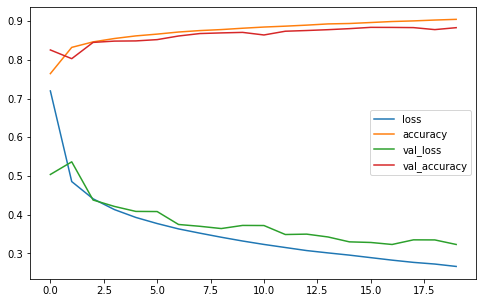

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8766


[0.34982678294181824, 0.8766000270843506]

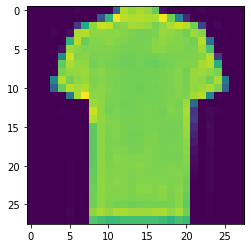

In [ ]:
import random
img = X_test[random.randint(0,9999),:,:]
plt.imshow(img)

In [ ]:
X_new = np.expand_dims(img, axis=0)
model.predict(X_new).round(2)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
class_names[int(y_pred)]

'T-shirt/top'

In [ ]:
#model.save("fashion-MLP.h5")
#model = keras.models.load_model("fashion-MLP.h5")
#ls
#rm fashion-MLP.h5